# Acquire Data for Classification

# Big Ideas
- Cache your data to speed up your data acquisition.
- Helper functions are your friends.


# Objectives
By the end of the acquire lesson and exercises, you will be able to...
- read data into a pandas DataFrame using the following modules:

In [1]:
# # pydataset

# from pydataset import data
# df = data('dataset_name')

In [2]:
# # seaborn datasets

# import seaborn as sns
# df = sns.load_dataset('dataset_name')

In [3]:
import pandas as pd
import numpy as np
import os

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password

# To access pydataset data table use:
from pydataset import data

4. In a jupyter notebook, `classification_exercises.ipynb`, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, `df_iris`, from this data.
- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

## 4. Create `df_iris`

- Use a python module (pydata or seaborn datasets) containing datasets as a source for the iris data.

In [4]:
data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [5]:
# Using pydataset

df_iris = data('iris')
df_iris.head(1)

# Does pydatataset not have the range column like seaborn does?  
# Also does it capitaliing column names affect anything?

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa


In [6]:
# Using seaborn -- love the column names.

df_iris = sns.load_dataset('iris')
df_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### Print the first 3 rows.

In [7]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [8]:
df_iris.iloc[0:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [9]:
df_iris.shape

(150, 5)

--------------------------

### Print the column names.

In [10]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
# Return a nice list of coluns if I want to grab and use them later.

df_iris.columns.to_list()


['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [12]:
for column in df_iris.columns:
    print(column)

sepal_length
sepal_width
petal_length
petal_width
species


## Print the data type of each column.

In [13]:
# Return just data types.

df_iris.dtypes # For one data type it's just 'dtype'

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [14]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
# This method returns the summary statistics for numeric variable in my df.

stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [16]:
# I can calculate a range for each numeric variable and select certain columns of interest.

stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,3.6
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,2.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,5.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,2.4


In [17]:
stats[['mean', '50%', 'std']]
# Use double brackets to make a list of the columns

,mean,50%,std
sepal_length,5.843333,5.80,0.828066
sepal_width,3.057333,3.00,0.435866
petal_length,3.758000,4.35,1.765298
petal_width,1.199333,1.30,0.762238


In [18]:
subset_of_columns = ['mean', '50%', 'std']
stats[subset_of_columns]

,mean,50%,std
sepal_length,5.843333,5.80,0.828066
sepal_width,3.057333,3.00,0.435866
petal_length,3.758000,4.35,1.765298
petal_width,1.199333,1.30,0.762238


5. Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing settings.
- assign the first 100 rows to a new dataframe, df_google_sheets_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

## Create `df_google`
- Read the data from a Google sheet into a dataframe, df_google.

In [19]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1kcrY0Q2IGFaEg0OgWxJORGCC0tNjH-L42Z0Q-4ajIUY/edit#gid=1023018493'
# Grabbed the Sheets URL.

In [20]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
# Turns the Sheets address into a CSV export URL.

In [21]:
df_google = pd.read_csv(csv_export_url)
df_google
# Uses the pandas '`pd.read_csv()` function to read the data

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No,13.5
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes,22.0
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No,1.8
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No,68.2


In [22]:
# Print the first 3 rows.

df_google.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8


In [23]:
# Print the number of rows and columns.
df_google.shape

(7049, 13)

In [24]:
# Print the column names.
df_google.columns.to_list()

['customer_id',
 'gender',
 'is_senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'internet_service',
 'contract_type',
 'payment_type',
 'monthly_charges',
 'total_charges',
 'churn',
 'tenure']

In [25]:
# Print the data type of each column.
df_google.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
tenure               float64
dtype: object

In [26]:
# Print the sumary statistics for each of the numeric variables.
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80
tenure,7049.0,32.380068,24.594926,0.00,8.7000,28.70,55.200,79.30


## Print the unique values for each of your categorical variables.

In [27]:
for col in df_google.columns:
    
        if df_google[col].dtypes == 'object':
            print(f'{col} has {df_google[col].nunique()} unique vlaues.')

customer_id has 7043 unique vlaues.
gender has 2 unique vlaues.
partner has 2 unique vlaues.
dependents has 2 unique vlaues.
payment_type has 4 unique vlaues.
churn has 2 unique vlaues.


In [28]:
for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(df_google[col].value_counts())

0048-LUMLS    2
0042-RLHYP    2
0042-JVWOJ    2
0040-HALCW    2
0036-IHMOT    2
             ..
3363-EWLGO    1
3363-DTIVD    1
3359-DSRKA    1
3354-OADJP    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
Male      3558
Female    3491
Name: gender, dtype: int64
No     3642
Yes    3407
Name: partner, dtype: int64
No     4934
Yes    2115
Name: dependents, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1548
Credit card (automatic)      1524
Name: payment_type, dtype: int64
No     5179
Yes    1870
Name: churn, dtype: int64


6. Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.
- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

## 6. Create `df_excel`
- Read the `Table1_CustDetails` table from the `Excel_Exercises.xlsx`, sheet_name='Table1_CustDetails')

In [29]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel._base:

read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=None, mangle_dupe_cols=True, storage_options: 'StorageOptions' = None)
    Read an Excel file into a pandas DataFrame.
    
    Supports `xls`, `xlsx`, `xlsm`, `xlsb`, `odf`, `ods` and `odt` file extensions
    read from a local filesystem or URL. Supports an option to read
    a single sheet or a list of sheets.
    
    Parameters
    ----------
    io : str, bytes, ExcelFile, xlrd.Book, path object, or file-like object
        Any valid string path is acceptable. The string could be a URL. Valid
        URL schemes include http, ftp, s3, and 

In [30]:
df_excel = pd.read_excel('Jason Turner - jemison_spreadsheet_exercises.xlsx', sheet_name='Table1_CustDetails')

In [31]:
# Assign the first 100 rows to a new dataframe, `df_excel_sample`.
df_excel.iloc[0:100]
df_excel_sample = df_excel.head(100)
df_excel_sample.shape

(100, 13)

In [32]:
# Print the number of rows of your original dataframe.
df_excel.shape[0]

7049

In [33]:
# Print the first 5 column names.
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [34]:
# Print the column names that have a data type of object.
df_excel.select_dtypes(include='object').head()

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes


In [35]:
df_excel.select_dtypes(include='object').columns.tolist()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [36]:
df_excel.select_dtypes(include=['object', 'int64']).head()
# You can pass of list of the data types that you want to include or exclude.

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes


In [37]:
# What if we want to exclude floats

df_excel.select_dtypes(exclude=['float64']).head()

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes


### Compute the range for each of the numeric variables.

In [38]:
# Some of these numeric columns are more like encoded categorical variables.

df_excel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.000000,0.000000,0.000000,1.000000
phone_service,7049.0,1.324585,0.642709,0.00,1.000000,1.000000,2.000000,2.000000
internet_service,7049.0,1.222585,0.779068,0.00,1.000000,1.000000,2.000000,2.000000
contract_type,7049.0,0.690878,0.833757,0.00,0.000000,0.000000,1.000000,2.000000
monthly_charges,7049.0,64.747014,30.099460,18.25,35.450000,70.350000,89.850000,118.750000
total_charges,7038.0,2283.043883,2266.521984,18.80,401.587500,1397.100000,3793.775000,8684.800000
tenure,7049.0,32.379866,24.595524,0.00,8.733456,28.683425,55.229399,79.341772


In [39]:
# I can select just the true numeric variables to declutter my results.

telco_stats = df_excel[['monthly_charges', 'total_charges']].describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [40]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


7. Read the data from this google sheet into a dataframe, df_google.
- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [41]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)
print(df_google.head(3))
print(df_google.shape)
print(df_google.columns.to_list())
print(df_google.info)
print(df_google.describe())
for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              

Make a new python module, acquire.py

**Make sure your `env.py` and csv files are *not* being pushed to GitHub!**

# Exercise 1 for `acquire.py`
Make a function named `get_titanic_data` that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [42]:
import acquire

In [43]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


## Exercise 2 for `acquire.py`

Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [44]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


### Exercise 3 for `acquire.py`

Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join all 4 tables together, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [45]:
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


### Add Caching to the `acquire.py` functions

Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [46]:
# if os.path.isfile('titanic_df.csv'):
        
#         # If csv file exists, read in data from csv file.
#         df = pd.read_csv('titanic_df.csv', index_col=0)
        
#     else:
        
#         # Read fresh data from db into a DataFrame.
#         df = new_titanic_data()
        
#         # Write DataFrame to a csv file.
#         df.to_csv('titanic_df.csv')
        
# if os.path.isfile('iris_df.csv'):
        
#         # If csv file exists read in data from csv file.
#         df = pd.read_csv('iris_df.csv', index_col=0)
        
#     else:
        
#         # Read fresh data from db into a DataFrame
#         df = new_iris_data()
        
#         # Cache data
#         df.to_csv('iris_df.csv')
        
# if os.path.isfile('telco.csv'):
        
#         # If csv file exists read in data from csv file.
#         df = pd.read_csv('telco.csv', index_col=0)
        
#     else:
        
#         # Read fresh data from db into a DataFrame
#         df = new_telco_data()
        
#         # Cache data
#         df.to_csv('telco.csv')

# Data Preparation

In [47]:
import pandas as pd
import numpy as np
import os

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password

# To access pydataset data table use:
from pydataset import data


##### Use the Iris Data to:

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

1. Use the function defined in acquire.py to load the iris data.

In [49]:
import acquire
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


2. Drop the `species_id` and `measurement_id` columns.

3. Rename the `species_name` column to just `species`.

4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [50]:
def clean_iris(df):

    '''Prepares acquired Iris data for exploration'''

    # drop column using .drop(columns=column_name)
    df = df.drop(columns='species_id')

    # remame column using .rename(columns={current_column_name : replacement_column_name})
    df = df.rename(columns={'species_name':'species'})

    # create dummies dataframe using .get_dummies(column_name,not dropping any of the dummy columns)
    dummy_df = pd.get_dummies(df['species'], drop_first=False)

    # join original df with dummies df using .concat([original_df,dummy_df], join along the index)
    df = pd.concat([df, dummy_df], axis=1)

    return df

In [51]:
clean_iris(iris_df).head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [52]:
def split_iris(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on species.
    return train, validate, test DataFrames.
    '''

    # splits df into train_validate and test using train_test_split() stratifying on species to get an even mix of each species
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.species)

    # splits train_validate into train and validate using train_test_split() stratifying on species to get an even mix of each species
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.species)
    return train, validate, test

5. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [53]:
def prep_iris(df):
    '''Prepares acquired Iris data for exploration'''

    # drop column using .drop(columns=column_name)
    df = df.drop(columns='species_id')

    # remame column using .rename(columns={current_column_name : replacement_column_name})
    df = df.rename(columns={'species_name':'species'})

    # create dummies dataframe using .get_dummies(column_name,not dropping any of the dummy columns)
    dummy_df = pd.get_dummies(df['species'], drop_first=False)

    # join original df with dummies df using .concat([original_df,dummy_df], join along the index)
    df = pd.concat([df, dummy_df], axis=1)

    # split data into train/validate/test using split_data function
    train, validate, test = split_iris(df)

    return train, validate, test 

##### Use the Titanic dataset to:

1. Use the function defined in `acquire.py` to load the Titanic data.

In [54]:
import acquire
titanic_df = acquire.get_titanic_data()
titanic_df.head(5)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


2. Drop any unnecessary, unhelpful, or duplicated columns.

In [55]:
def clean_titanic(df):
    '''
    This function will clean the data prior to splitting.
    '''
    # Drops any duplicate values
    df = df.drop_duplicates()
    
    # Drops columns that are already represented by other columns
    cols_to_drop = ['deck', 'embarked', 'class']
    dr = df.drop(columns = cols_to_drop)
    
    # Fills the small number of null values for embark_town with the mode
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    
    # Uses one-hot encoding to create dummies of string columns for future modeling
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [56]:
def split_titanic(df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    # 
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df.survived)
    
    #
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
    
    return train, validate, test

In [57]:
split_titanic(titanic_df)

(     passenger_id  survived  pclass     sex   age  sibsp  parch      fare  \
 583           583         0       1    male  36.0      0      0   40.1250   
 165           165         1       3    male   9.0      0      2   20.5250   
 50             50         0       3    male   7.0      4      1   39.6875   
 259           259         1       2  female  50.0      0      1   26.0000   
 306           306         1       1  female   NaN      0      0  110.8833   
 ..            ...       ...     ...     ...   ...    ...    ...       ...   
 313           313         0       3    male  28.0      0      0    7.8958   
 636           636         0       3    male  32.0      0      0    7.9250   
 222           222         0       3    male  51.0      0      0    8.0500   
 485           485         0       3  female   NaN      3      1   25.4667   
 744           744         1       3    male  31.0      0      0    7.9250   
 
     embarked   class deck  embark_town  alone  
 583        C

In [58]:
def impute_titanic_mode(train, validate, test):
    '''
    Takes in train, validate, and test, and uses train to identify the best value to replace nulls in embark_town
    Imputes that value into all three sets and returns all three sets
    '''
    imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
    train[['embark_town']] = imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']] = imputer.transform(validate[['embark_town']])
    test[['embark_town']] = imputer.transform(test[['embark_town']])
    return train, validate, test

In [59]:
def impute_mean_age(train, validate, test):
    '''
    This function imputes the mean of the age column for
    observations with missing values.
    Returns transformed train, validate, and test df.
    '''
    # create the imputer object with mean strategy
    imputer = SimpleImputer(strategy = 'mean')

    # fit on and transform age column in train
    train['age'] = imputer.fit_transform(train[['age']])

    # transform age column in validate
    validate['age'] = imputer.transform(validate[['age']])

    # transform age column in test
    test['age'] = imputer.transform(test[['age']])

    return train, validate, test

4. Create a function named `prep_titanic` that accepts the raw titanic data, and returns the data with the transformations above applied.

In [60]:
def prep_titanic(df):
    '''
    This function takes in a df and will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    create dummy vars from sex and embark_town, and perform a train, validate, test split. 
    Returns train, validate, and test DataFrames
    '''
    df = clean_titanic(df)
    train, validate, test = split_titanic(df)
    train, validate, test = impute_mean_age(train, validate, test)
    return train, validate, test

prep_titanic(titanic_df)

(     passenger_id  survived  pclass     sex        age  sibsp  parch  \
 583           583         0       1    male  36.000000      0      0   
 165           165         1       3    male   9.000000      0      2   
 50             50         0       3    male   7.000000      4      1   
 259           259         1       2  female  50.000000      0      1   
 306           306         1       1  female  29.678105      0      0   
 ..            ...       ...     ...     ...        ...    ...    ...   
 313           313         0       3    male  28.000000      0      0   
 636           636         0       3    male  32.000000      0      0   
 222           222         0       3    male  51.000000      0      0   
 485           485         0       3  female  29.678105      3      1   
 744           744         1       3    male  31.000000      0      0   
 
          fare embarked   class deck  embark_town  alone  sex_male  \
 583   40.1250        C   First    A    Cherbourg   

##### Use the Telco dataset to:

1. Use the function defined in `acquire.py` to load the Telco data.

In [61]:
import acquire
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [62]:
def clean_telco(df):
    '''
    This function will clean the data prior to splitting.
    '''
    # Drops any duplicate values
    df = df.drop_duplicates()
    
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
        
    return df

In [63]:
clean_telco(telco_df)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [64]:
def split_telco(df):
    '''
    This function will take in a DataFrame and return train, validate, and test DataFrames; stratify on total_charges 
    return train, validate, test DataFrames
    '''
    
    #
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df.senior_citizen)
    
    #
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.senior_citizen)
    
    return train, validate, test

In [65]:
split_telco(telco_df)

(      payment_type_id  internet_service_type_id  contract_type_id customer_id  \
 2225                3                         1                 2  3181-VTHOE   
 5549                3                         3                 1  7814-LEEVE   
 4319                4                         1                 1  6092-QZVPP   
 2778                1                         2                 1  3955-JBZZM   
 146                 2                         2                 1  0239-OXEXL   
 ...               ...                       ...               ...         ...   
 4040                4                         1                 3  5696-JVVQY   
 293                 3                         2                 2  0431-APWVY   
 2892                1                         2                 3  4119-ZYPZY   
 4287                3                         2                 3  6035-RIIOM   
 3360                1                         2                 1  4795-KTRTH   
 
       gender 

4. Create a function named `prep_telco` that accepts the raw telco data, and returns the data with the transformations above applied.

In [66]:
def prep_telco(df):
    # Drop duplicate columns
    # df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
    
    # Drop null values stored as whitespace
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    
    # Convert to correct datatype
    df['total_charges'] = df.total_charges.astype(float)
    
    # Convert binary categorical variables to numeric.  It's similar to using one-hot
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['churn_endcoded'] = df.churn.map({'Yes': 1, 'No': 0})
    
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                                  'online_security', \
                                  'online_backup', \
                                  'tech_support', \
                                  'streaming_tv', \
                                  'streaming_movies', \
                                  'contract_type', \
                                  'internet_service_type', \
                                  'payment_type']], dummy_na=False, \
                                  drop_first=True)
    
    # Concatenate dummy dataframe to original
    df = pd.concat([df, dummy_df], axis=1)
    
    # split the data
    train, validate, test = split_telco(df)
    
    return train, validate, test

In [67]:
prep_telco(telco_df)

(      payment_type_id  internet_service_type_id  contract_type_id customer_id  \
 6655                4                         1                 2  9470-RTWDV   
 5605                1                         2                 1  7892-QVYKW   
 3539                2                         3                 1  5018-HEKFO   
 4339                2                         1                 3  6122-EFVKN   
 4108                4                         3                 2  5808-TOTXO   
 ...               ...                       ...               ...         ...   
 6968                3                         1                 3  9888-ZCUMM   
 1302                4                         3                 2  1934-MKPXS   
 6212                2                         1                 3  8780-YRMTT   
 5264                3                         3                 3  7416-CKTEP   
 1264                4                         3                 1  1866-ZSLJM   
 
       gender 

# Exploratory Analysis
### Exercises Part I

#### Section 1 - iris_db:
1. Acquire, prepare & split your data.

In [68]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [69]:
train, validate, test = prep_iris(iris_df)
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

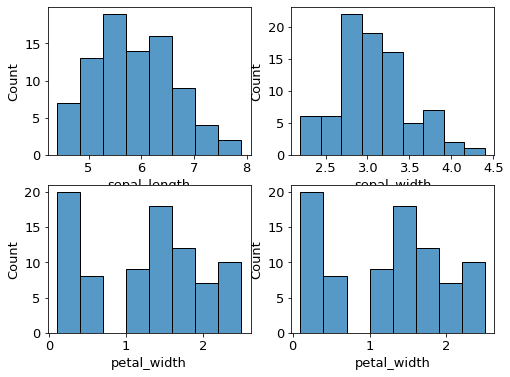

In [93]:
plt.subplot(221)
sns.histplot(train.sepal_length)

plt.subplot(222)
sns.histplot(train.sepal_width)

plt.subplot(223)
sns.histplot(train.petal_width)

plt.subplot(224)
sns.histplot(train.petal_width)


<AxesSubplot:xlabel='petal_width'>

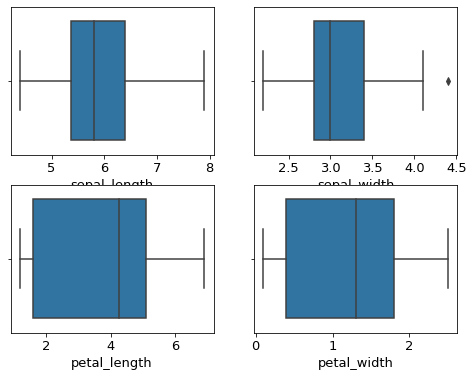

In [94]:
plt.subplot(221)
sns.boxplot(train.sepal_length)

plt.subplot(222)
sns.boxplot(train.sepal_width)

plt.subplot(223)
sns.boxplot(train.petal_length)

plt.subplot(224)
sns.boxplot(train.petal_width)


In [95]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [105]:
train.head(3)

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1


In [114]:
T_train_freq = train.T
T_train_freq

,79,36,133,95,18,139,20,31,6,115,...,137,132,5,88,140,11,85,55,44,73
species,versicolor,setosa,virginica,versicolor,setosa,virginica,setosa,setosa,setosa,virginica,...,virginica,virginica,setosa,versicolor,virginica,setosa,versicolor,versicolor,setosa,versicolor
sepal_length,5.7,5.5,6.3,5.7,5.7,6.9,5.4,5.4,4.6,6.4,...,6.4,6.4,5.4,5.6,6.7,4.8,6.0,5.7,5.1,6.1
sepal_width,2.6,3.5,2.8,3.0,3.8,3.1,3.4,3.4,3.4,3.2,...,3.1,2.8,3.9,3.0,3.1,3.4,3.4,2.8,3.8,2.8
petal_length,3.5,1.3,5.1,4.2,1.7,5.4,1.7,1.5,1.4,5.3,...,5.5,5.6,1.7,4.1,5.6,1.6,4.5,4.5,1.9,4.7
petal_width,1.0,0.2,1.5,1.2,0.3,2.1,0.2,0.4,0.3,2.3,...,1.8,2.2,0.4,1.3,2.4,0.2,1.6,1.3,0.4,1.2
setosa,0,1,0,0,1,0,1,1,1,0,...,0,0,1,0,0,1,0,0,1,0
versicolor,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
virginica,0,0,1,0,0,1,0,0,0,1,...,1,1,0,0,1,0,0,0,0,0


In [118]:
pd.crosstab(index=train['species'], columns=train['sepal_length'])

sepal_length,4.4,4.5,4.6,4.8,4.9,5.0,5.1,5.2,5.3,5.4,...,6.4,6.5,6.6,6.7,6.8,6.9,7.2,7.3,7.7,7.9
species,,,,,,,,,,,,,,,,,,,,,
setosa,1,1,2,3,1,7,3,1,1,4,...,0,0,0,0,0,0,0,0,0,0
versicolor,0,0,0,0,1,0,0,0,0,1,...,2,1,1,0,0,1,0,0,0,0
virginica,0,0,0,0,0,0,0,0,0,0,...,5,1,0,3,1,3,3,1,1,1


In [125]:
freq_train = pd.crosstab(index=train['species'], columns=[train.sepal_length, train.sepal_width, train.petal_length, train.petal_width])
freq_train

sepal_length 4.4 4.5 4.6     4.8         4.9     5.0  ... 6.9             7.2  \
sepal_width  2.9 2.3 3.1 3.4 3.0 3.4     2.4 3.0 3.0  ... 3.1         3.2 3.0   
petal_length 1.4 1.3 1.5 1.4 1.4 1.6 1.9 3.3 1.4 1.6  ... 4.9 5.1 5.4 5.7 5.8   
petal_width  0.2 0.3 0.2 0.3 0.1 0.2 0.2 1.0 0.2 0.2  ... 1.5 2.3 2.1 2.3 1.6   
species                                               ...                       
setosa         1   1   1   1   1   1   1   0   1   1  ...   0   0   0   0   0   
versicolor     0   0   0   0   0   0   0   1   0   0  ...   1   0   0   0   0   
virginica      0   0   0   0   0   0   0   0   0   0  ...   0   1   1   1   1   

sepal_length         7.3 7.7 7.9  
sepal_width  3.2 3.6 2.9 2.6 3.8  
petal_length 6.0 6.1 6.3 6.9 6.4  
petal_width  1.8 2.5 1.8 2.3 2.0  
species                           
setosa         0   0   0   0   0  
versicolor     0   0   0   0   0  
virginica      1   1   1   1   1  

[3 rows x 84 columns]

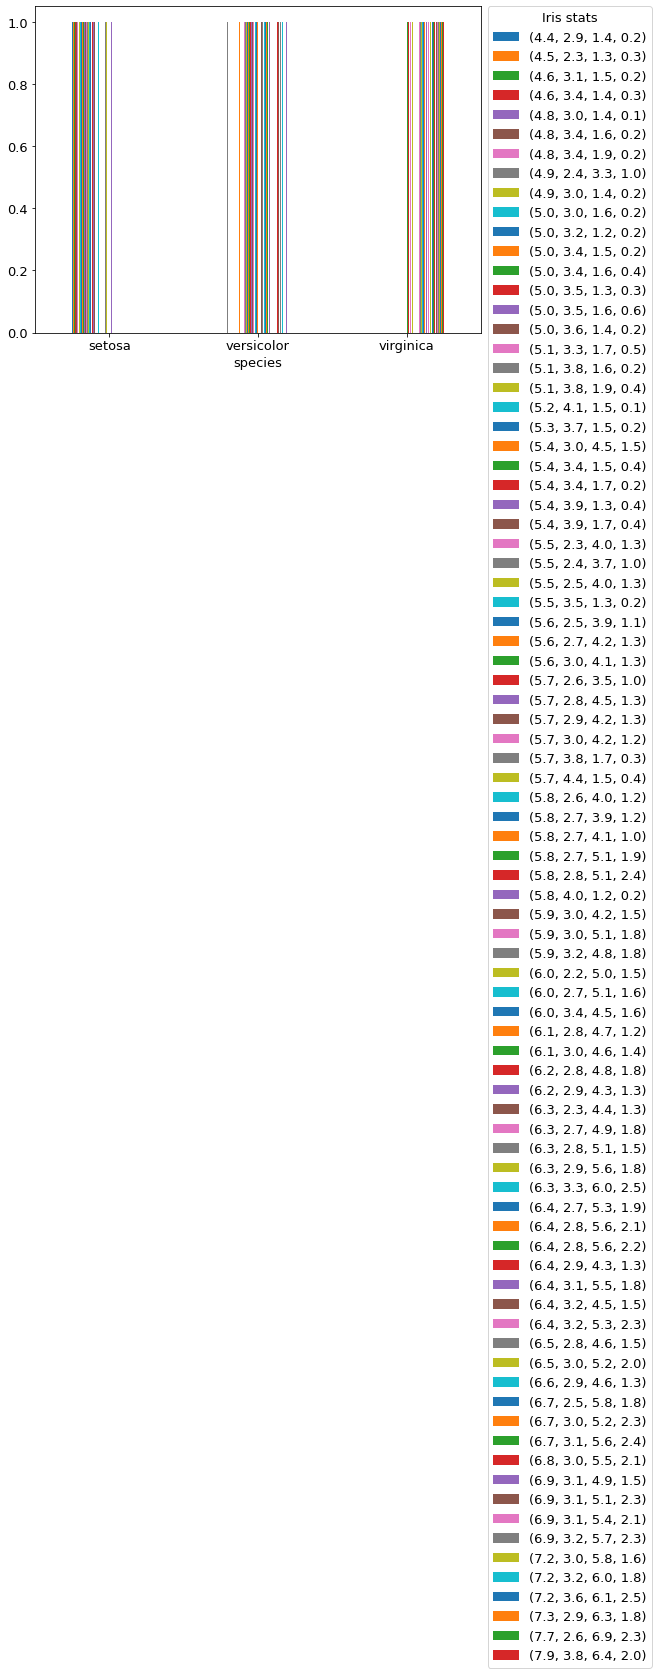

In [126]:
# Bar ploting
a = freq_train.plot(kind='bar', rot=0)
a.legend(title='Iris stats', bbox_to_anchor=(1, 1.02),
         loc='upper left')

In [129]:
sl_train = pd.crosstab(index=train['species'], columns=[train.sepal_length])
sw_train = pd.crosstab(index=train['species'], columns=[train.sepal_width])
pl_train = pd.crosstab(index=train['species'], columns=[train.petal_length])
pw_train = pd.crosstab(index=train['species'], columns=[train.petal_width])

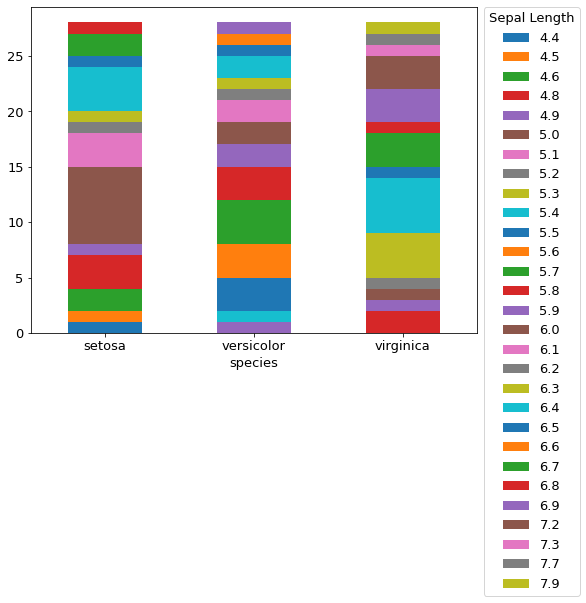

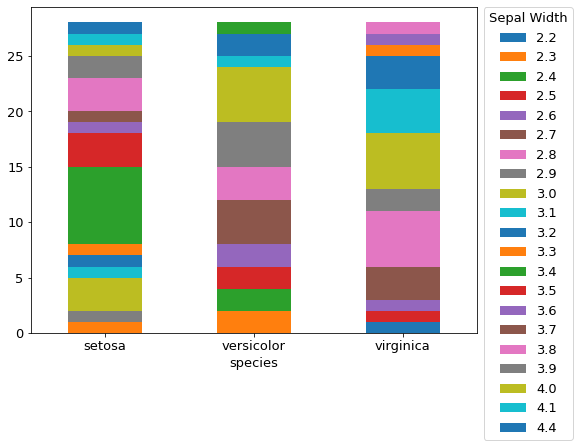

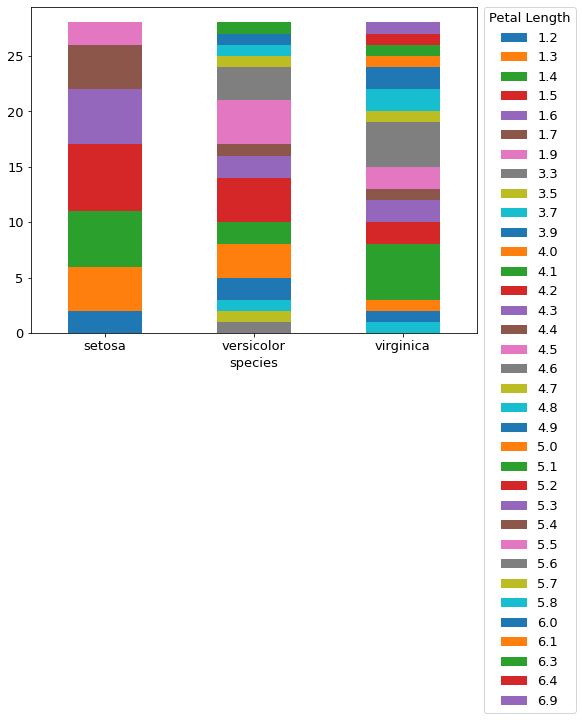

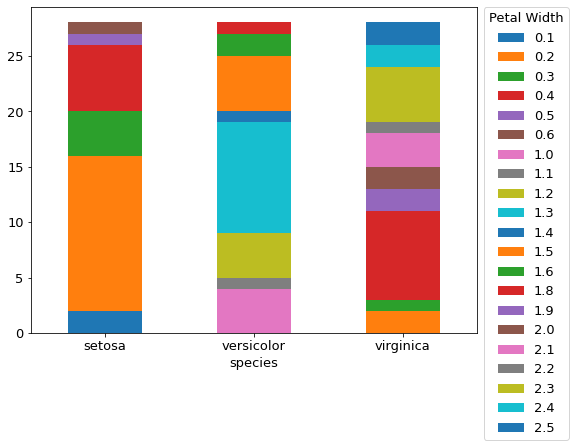

In [133]:
# Creating barplot
sl_plot = sl_train.plot(kind="bar", stacked=True, rot=0)
sl_plot.legend(title='Sepal Length', bbox_to_anchor=(1, 1.02),
         loc='upper left')

sw_plot = sw_train.plot(kind="bar", stacked=True, rot=0)
sw_plot.legend(title='Sepal Width', bbox_to_anchor=(1, 1.02),
         loc='upper left')

pl_plot = pl_train.plot(kind="bar", stacked=True, rot=0)
pl_plot.legend(title='Petal Length', bbox_to_anchor=(1, 1.02),
         loc='upper left')

pw_plot = pw_train.plot(kind="bar", stacked=True, rot=0)
pw_plot.legend(title='Petal Width', bbox_to_anchor=(1, 1.02),
         loc='upper left')

- Document takeaways & any actions.

In [135]:
# Sepal length and width have fairly normal distributions
# Petal length and width appear to have a somewhat bimodal distribution

3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [136]:
train.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0


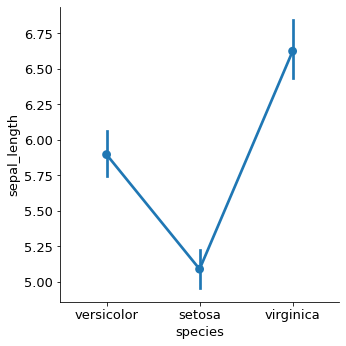

In [138]:
sns.factorplot(x = 'species', y = 'sepal_length', data = train)

In [139]:
train.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0


In [140]:
train['sepal_length'].mean()

5.870238095238095

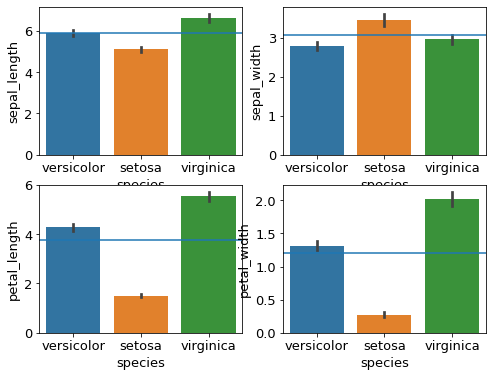

In [141]:
plt.subplot(221)
iris_bar = sns.barplot(x="species", y="sepal_length", data=train)
iris_bar.axhline(train['sepal_length'].mean())

plt.subplot(222)
iris_bar = sns.barplot(x="species", y="sepal_width", data=train)
iris_bar.axhline(train['sepal_width'].mean())

plt.subplot(223)
iris_bar = sns.barplot(x="species", y="petal_length", data=train)
iris_bar.axhline(train['petal_length'].mean())

plt.subplot(224)
iris_bar = sns.barplot(x="species", y="petal_width", data=train)
iris_bar.axhline(train['petal_width'].mean())

- For each measurement type, compute the descriptive statistics for each species.

In [142]:
train['species'].describe()

count             84
unique             3
top       versicolor
freq              28
Name: species, dtype: object

In [150]:
iris_grps = train.groupby("species")
iris_grps.describe()

sepal_length                                                    \
                  count      mean       std  min    25%   50%    75%  max   
species                                                                     
setosa             28.0  5.089286  0.360390  4.4  4.875  5.00  5.400  5.8   
versicolor         28.0  5.896429  0.425556  4.9  5.600  5.80  6.125  6.9   
virginica          28.0  6.625000  0.532378  5.8  6.300  6.45  6.900  7.9   

           sepal_width            ... versicolor      virginica            \
                 count      mean  ...        75%  max     count mean  std   
species                           ...                                       
setosa            28.0  3.467857  ...        0.0  0.0      28.0  0.0  0.0   
versicolor        28.0  2.796429  ...        1.0  1.0      28.0  0.0  0.0   
virginica         28.0  2.960714  ...        0.0  0.0      28.0  1.0  0.0   

                                     
            min  25%  50%  75%  max  
species                              
setosa      0.0  0.0  0.0  0.0  0.0  
versicolor  0.0  0.0  0.0  0.0  0.0  
virginica   1.0  1.0  1.0  1.0  1.0  

[3 rows x 56 columns]

In [144]:
from scipy import stats

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [154]:
# Come back and review and figure out what alternative is for
versicolor = train[train.species == 'versicolor']
virginica = train[train.species == 'virginica']
setosa = train[train.species == 'setosa']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="greater")
t, p

(767.0, 3.235595834904965e-10)

In [156]:
test_var = ['petal_width', 'sepal_width', 'petal_length', 'sepal_length']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing petal_width between virginica and versicolor
767.0 3.235595834904965e-10
------------------


Comparing sepal_width between virginica and versicolor
510.0 0.02628629569922847
------------------


Comparing petal_length between virginica and versicolor
776.5 1.4739917857575313e-10
------------------


Comparing sepal_length between virginica and versicolor
676.5 1.541014598267054e-06
------------------




- Document takeaways & any actions.
 - Virginica had the largest average size and greatest standard deviation
 - Setosa's petal area was much lower than the rest
 - Versicolor averaged in between for most categories

4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

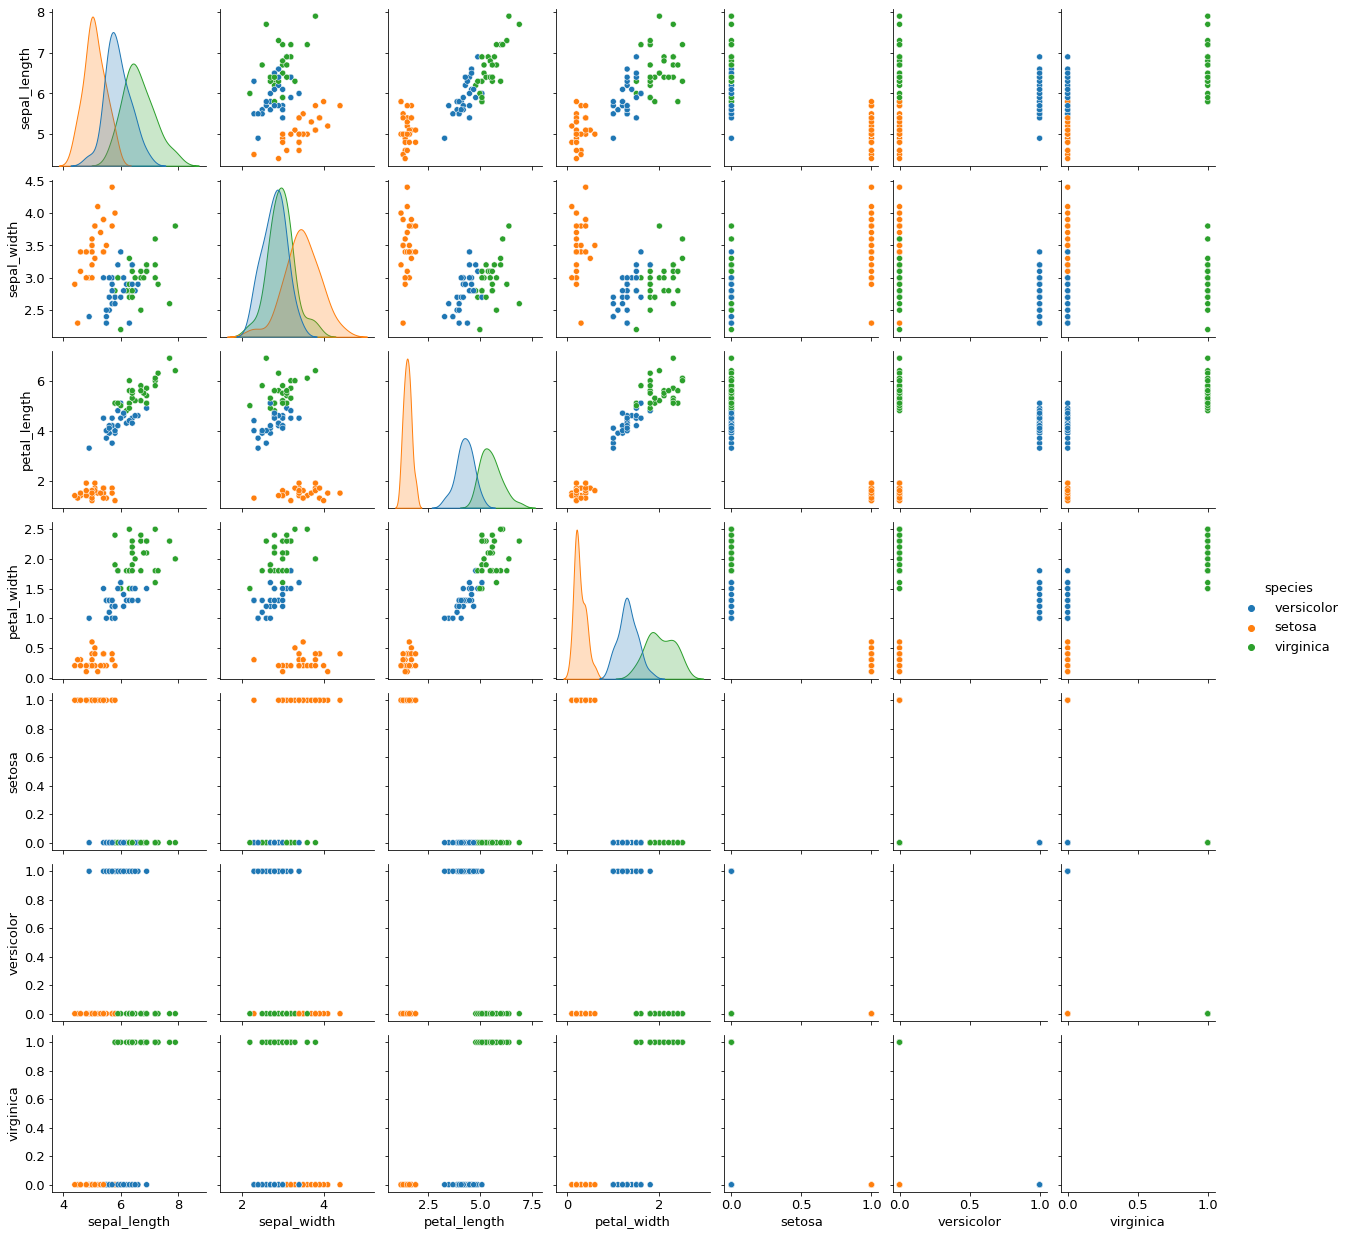

In [145]:
sns.pairplot(train, hue="species")

- Visualize two numeric variables by means of the species. Hint: `sns.relplot` with `hue` or `col`

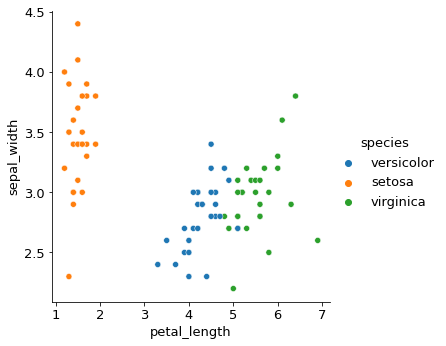

In [146]:
sns.relplot(data=train, x= "petal_length", y="sepal_width", hue="species")

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [147]:
iris_melt = pd.melt(train, id_vars =['species'], value_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_melt

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


<AxesSubplot:xlabel='variable', ylabel='value'>

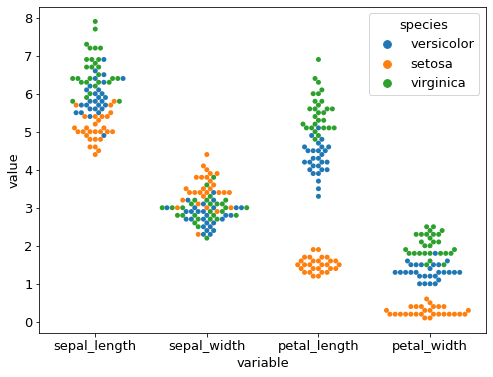

In [159]:
sns.swarmplot(x="variable", y="value", hue='species', data=iris_melt)

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [176]:
virginica_sepal_area =(virginica['sepal_length'] * virginica['sepal_width'])
setosa_sepal_area = (setosa['sepal_length'] * setosa['sepal_width'])

t, p = stats.mannwhitneyu(virginica_sepal_area, setosa_sepal_area, alternative="greater")
t, p

(524.0, 0.015574507053234803)

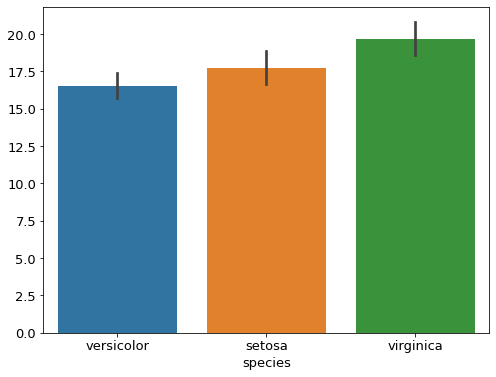

In [189]:
sepal_area = sns.barplot(x='species', y=(train['sepal_length'] * train['sepal_width']), data=train)

In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
 5   setosa        84 non-null     uint8  
 6   versicolor    84 non-null     uint8  
 7   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 6.2+ KB


In [161]:
(train["sepal_length"] * train["sepal_width"]).head()

79     14.82
36     19.25
133    17.64
95     17.10
18     21.66
dtype: float64

In [171]:
sepal_areas = (versicolor['sepal_length'] * versicolor['sepal_width']).mean(), (virginica['sepal_length'] * virginica['sepal_width']).mean(), (setosa['sepal_length'] * setosa['sepal_width']).mean()

(16.538928571428567, 19.694999999999997, 17.760714285714283)

In [162]:
iris_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   species   336 non-null    object 
 1   variable  336 non-null    object 
 2   value     336 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.0+ KB


In [163]:
iris_grps.describe()

sepal_length                                                    \
                  count      mean       std  min    25%   50%    75%  max   
species                                                                     
setosa             28.0  5.089286  0.360390  4.4  4.875  5.00  5.400  5.8   
versicolor         28.0  5.896429  0.425556  4.9  5.600  5.80  6.125  6.9   
virginica          28.0  6.625000  0.532378  5.8  6.300  6.45  6.900  7.9   

           sepal_width            ... versicolor      virginica            \
                 count      mean  ...        75%  max     count mean  std   
species                           ...                                       
setosa            28.0  3.467857  ...        0.0  0.0      28.0  0.0  0.0   
versicolor        28.0  2.796429  ...        1.0  1.0      28.0  0.0  0.0   
virginica         28.0  2.960714  ...        0.0  0.0      28.0  1.0  0.0   

                                     
            min  25%  50%  75%  max  
species                              
setosa      0.0  0.0  0.0  0.0  0.0  
versicolor  0.0  0.0  0.0  0.0  0.0  
virginica   1.0  1.0  1.0  1.0  1.0  

[3 rows x 56 columns]

In [ ]:
# versicolor sepal area is much greater on average than the other two.

- Document takeaways and any actions.

### Exercises Part II
Explore your `titanic` dataset more completely

In [164]:
import acquire
import prepare
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


- Determine drivers of the target variable

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns


- Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.



### Exercises Part III

- Explore your `telco` data to discover drivers of churn

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.


What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.